In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.ipynb_checkpoints', 'heart.csv', 'heart2.csv', 'heart_predict.ipynb', 'heart_prediction2.ipynb']


In [4]:
dataset = pd.read_csv("heart.csv")

In [5]:
type(dataset)

pandas.core.frame.DataFrame

In [6]:
dataset.shape

(303, 14)

In [7]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
245,48,1,0,124,274,0,0,166,0,0.5,1,0,3,0
43,53,0,0,130,264,0,0,143,0,0.4,1,0,2,1
224,54,1,0,110,239,0,1,126,1,2.8,1,1,3,0
235,51,1,0,140,299,0,1,173,1,1.6,2,0,3,0
266,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0


In [9]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [12]:
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [14]:
dataset["target"].unique()

array([1, 0], dtype=int64)

In [15]:
#The correlation values 
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


In [16]:
#Data Analysis

target
1    165
0    138
Name: count, dtype: int64


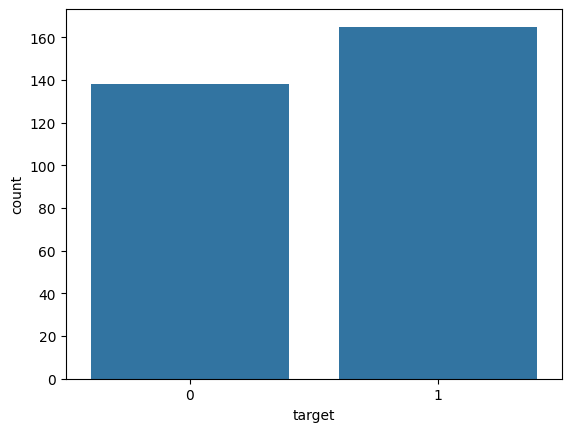

In [40]:
y = dataset["target"]

sns.countplot(x = y)


target_temp = dataset.target.value_counts()

print(target_temp)

In [18]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))


Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


<Axes: xlabel='sex', ylabel='target'>

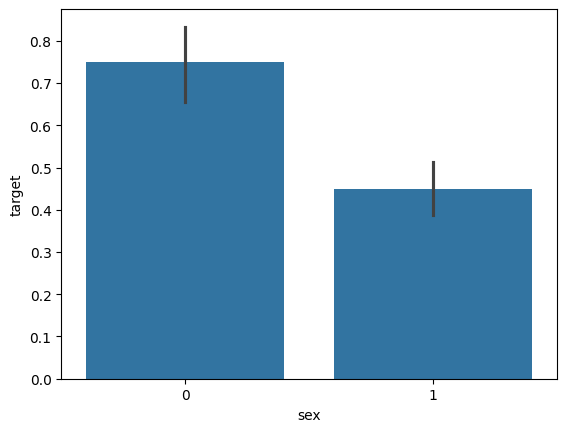

In [25]:
sns.barplot(x = dataset["sex"],y = target)

In [26]:
dataset["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

<Axes: xlabel='cp', ylabel='target'>

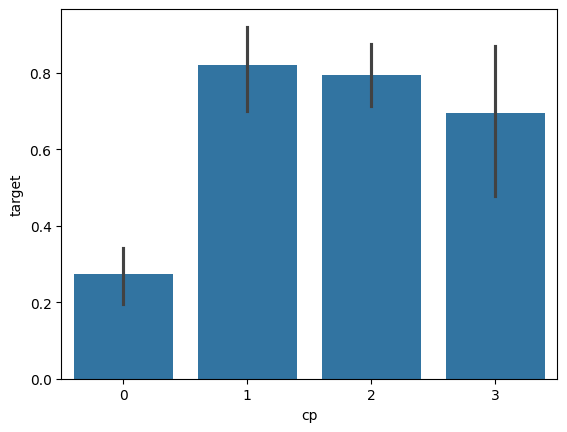

In [31]:
sns.barplot(x = dataset["cp"],y = target)

In [32]:
dataset["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

<Axes: xlabel='fbs', ylabel='target'>

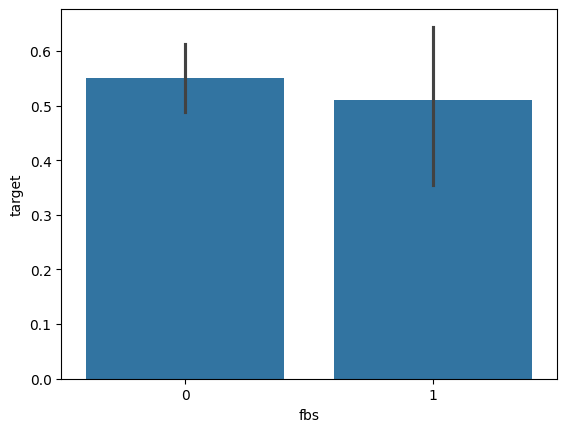

In [34]:
sns.barplot(x = dataset["fbs"],y = target)

<Axes: xlabel='restecg', ylabel='target'>

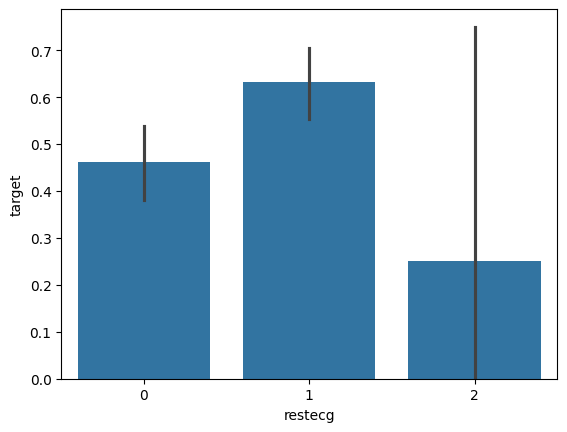

In [35]:
sns.barplot(x = dataset["restecg"],y = target)

<Axes: xlabel='exang', ylabel='target'>

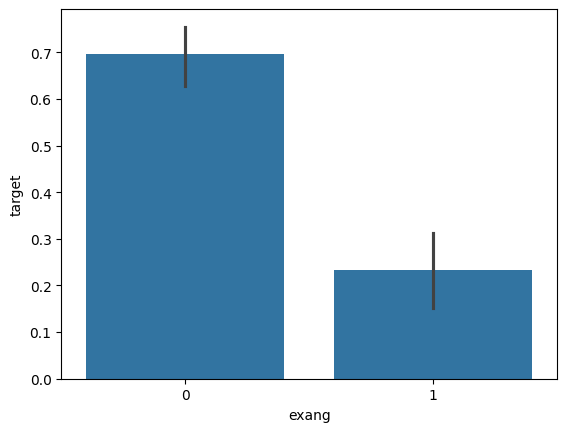

In [36]:
sns.barplot(x = dataset["exang"],y = target)

<Axes: xlabel='slope', ylabel='target'>

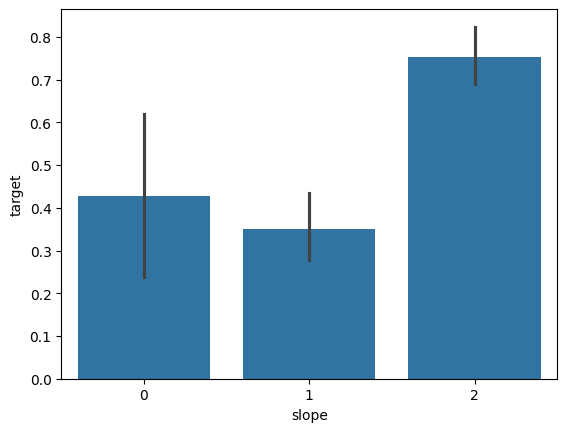

In [37]:
sns.barplot(x = dataset["slope"],y = target)

<Axes: xlabel='ca', ylabel='count'>

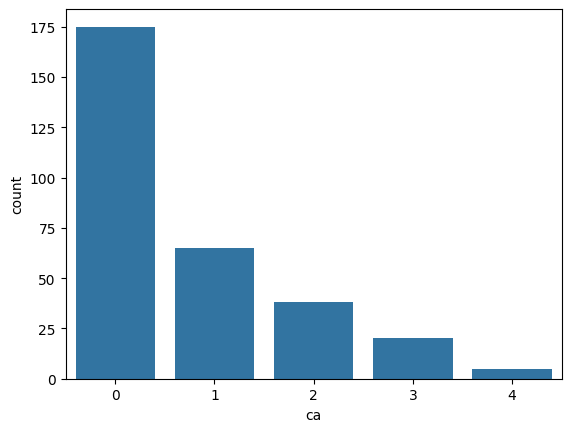

In [39]:
sns.countplot(x = dataset["ca"])

In [41]:
dataset["thal"].unique()

array([1, 2, 3, 0], dtype=int64)

<Axes: xlabel='thal', ylabel='target'>

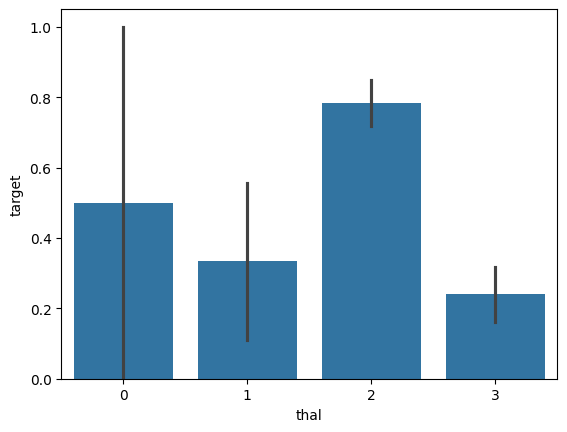

In [42]:
sns.barplot(x = dataset["thal"],y = target)

In [13]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.21,random_state=0)

In [43]:
X_train.shape

(239, 13)

In [44]:
X_test.shape

(64, 13)

In [45]:
Y_train.shape

(239,)

In [46]:
Y_test.shape

(64,)

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(1,2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [49]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest is: 92.19 %


In [50]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, Y_pred_rf))


[[24  3]
 [ 2 35]]


In [51]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_rf))


              precision    recall  f1-score   support

           0       0.92      0.89      0.91        27
           1       0.92      0.95      0.93        37

    accuracy                           0.92        64
   macro avg       0.92      0.92      0.92        64
weighted avg       0.92      0.92      0.92        64



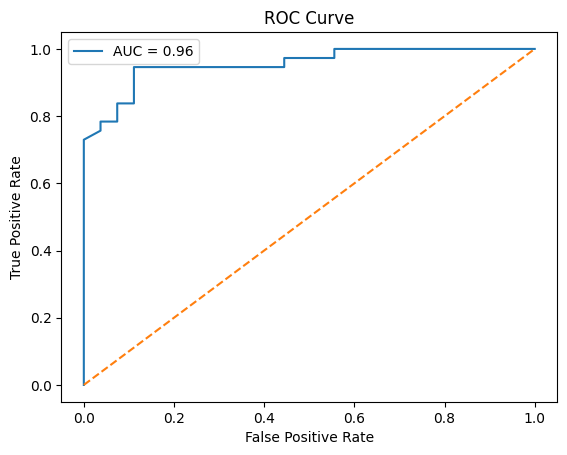

In [52]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

probs = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(Y_test, probs)
auc = roc_auc_score(Y_test, probs)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [56]:
import pickle
with open('heart_prediction_model.pkl', 'wb') as file:
    pickle.dump(rf, file)

In [57]:
#saved the .pkl model to our team's folder